In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction utilisés dans le TME




memeintervalle va voir si les intervalles sont bon sachant qu'on commence toujours un intervalle par le 0 et qu'il finit toujours avec une valeur 0 . 

appartenance vca calculer l'appartenance d'un point, visualitation et complementaire vont permettre de visualiser l'ensemble des points d'un ensemble


In [289]:
def memeintervalle(liste1,liste2):
    if liste1[-1][0]==liste2[-1][0]:# test si les intevalles ce finisse au même endroit
        return 0
    elif liste1[-1][0]>liste2[-1][0]:# si liste1 est plus grand que liste2,on ajoute un point avec 0 dans liste2
        y = list(liste2[-1])
        y[0] = liste1[-1][0]
        y[1]=0
        x = tuple(y)
        liste2.append(x)
    else:# sinon l'inverse
        y = list(liste1[-1])
        y[0] = liste2[-1][0]
        y[1]=0
        x = tuple(y)
        
        liste1.append(x)

In [799]:
def appartenance(point,liste): 
    if point<int(liste[0][0]):# si le point est inferieur au debut
        return 0
    for i in range(len(liste)):
        if point<liste[i][0] and point>liste[i-1][0]:#cas croissant
            if liste[i][1]>liste[i-1][1]:
                return (liste[i][1]*(point-liste[i-1][0]))/(liste[i][0]-liste[i-1][0])
            else:
                if liste[i][1]==0 and liste[i-1][1]==1:
                    return(liste[i][0]-point)/(liste[i][0]-liste[i-1][0])# cas decroissant avec le cas ou on va de zero à 1
                elif liste[i-1][1]==1 :# cas ou on pars de 1
                    return (liste[i-1][1]-liste[i][1])*(liste[i][0]-liste[i-1][0])*(liste[i][0]-point)
                elif liste[i][1]== liste[i-1][1]:# Si les deux points sont les mêmes
                    return liste[i][1]
                else:# quand on ne va pas de 0 à 1 ou on ne pars pas de 1
                    return liste[i-1][1]-(liste[i-1][1]-liste[i][1])*1/((liste[i][0]-liste[i-1][0])*(liste[i][0]-point))
        elif point==liste[i][0]:
            return liste[i][1]

        

In [802]:
def visualisation(listes):#on recupere les intervales et on calcul les valeurs de chacun des points
    maxi=-np.inf
    mini=np.inf
    liste=[]
    for i in listes:
        if i[0]<mini:
            mini=i[0]
        if i[0]>maxi:
            maxi=i[0]
    for i in range(0,maxi+1):
        liste.append((i,appartenance(i,listes)))# on ajoute chaque point
        
    plt.plot(*zip(*liste))
    plt.show()
    return liste
        

In [803]:
def complementaire(listes):##on recupere les intervales et on calcul les valeurs du complementaire chacun des points
    maxi=-np.inf
    mini=np.inf
    liste=[]
    for i in listes:
        if i[0]<mini:
            mini=i[0]
        if i[0]>maxi:
            maxi=i[0]
    for i in range(0,maxi+1):
        liste.append((i,1-appartenance(i,listes)))# 1-complementaire
    plt.plot(*zip(*liste))
    plt.show()
    return liste
    

# test des fonctions

In [840]:
liste=[(3,1),(4,1),(6,0)]
liste2=[(1,0),(4, 1),(6, 0.6)]


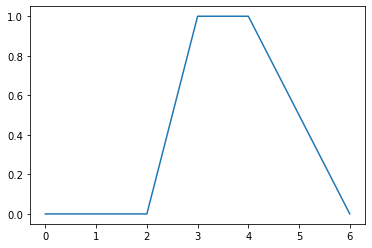

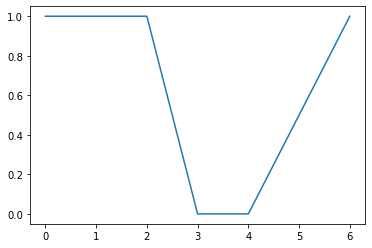

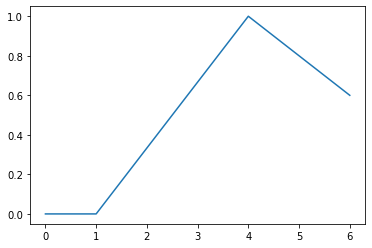

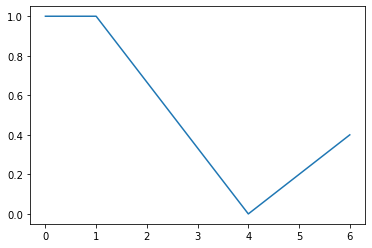

In [841]:
listeappartenance1=visualisation(liste)
listecomplementaire=complementaire(liste)
listeappartenance2=visualisation(liste2)
listecomplementaire=complementaire(liste2)


# Norme

In [827]:
class Tnorme:
    def __init__(self, liste, fonction):
        self.liste = liste
        self.fonction = fonction# types de fonction appele
        
    def norme(self,listeinput1,listeinput2):# choix de la fonction en fonction des parametres initiaux
        if self.fonction=="Probabiliste":
            return self.Probabiliste(listeinput1,listeinput2)
        elif self.fonction=="Lukasiewicz":
            return self.Lukasiewicz(listeinput1,listeinput2)
        elif self.fonction== "Zadeh":
            return self.Zadeh(listeinput1,listeinput2)

    def Probabiliste(self,liste1,liste2):# probabiliste
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,np.dot(liste1b[i][1],liste2b[i][1])))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef
    def Lukasiewicz(self,liste1,liste2):# Lukasiewicz
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,max(liste1b[i][1]+liste2b[i][1]-1,0)))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef

    def Zadeh(self,liste1,liste2):# Zadeh
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,min(liste1b[i][1],liste2b[i][1])))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef

    def fonctionn(self,listeinput1,listeinput2):# mettre à jour la liste en appelant norme
        liste=self.norme(listeinput1,listeinput2)

proba


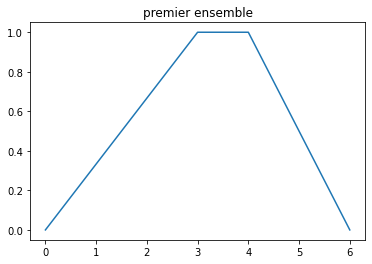

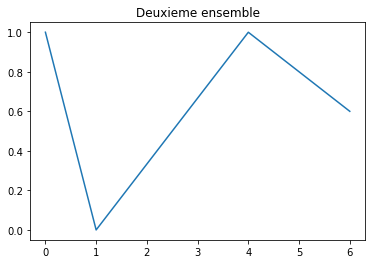

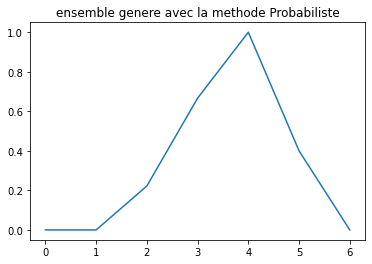

In [845]:

liste=[(0,0),(3,1),(4,1),(6,0)]
liste2=[(0,1),(1,0),(4, 1),(6, 0.6)]
print("proba")
tnorme=Tnorme([],"Probabiliste")
tnorme.fonctionn(liste,liste2)



Luka


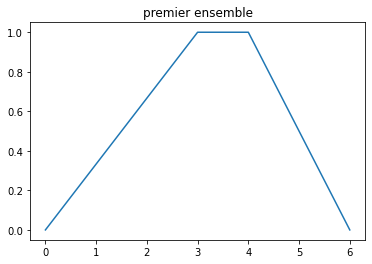

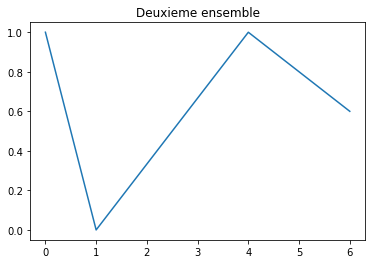

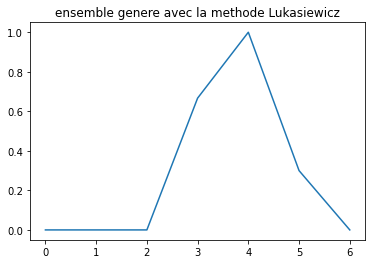

In [846]:
print("Luka")
tnorme2=Tnorme([],"Lukasiewicz")
tnorme2.fonctionn(liste,liste2)

Zadeh


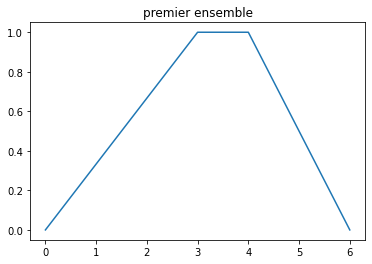

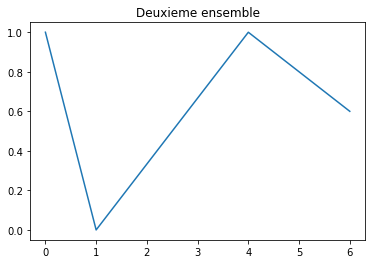

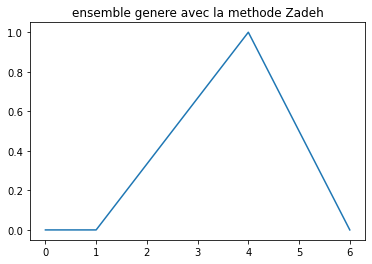

In [848]:
print("Zadeh")
tnorme3=Tnorme([],"Zadeh")
tnorme3.fonctionn(liste,liste2)

# T conorme

In [769]:
class Tconorme:
    def __init__(self, liste, fonction):
        self.liste = liste
        self.fonction = fonction# types de fonction appele
        
        
    def norme(self,listeinput1,listeinput2):# choix de la fonction en fonction des parametres initiau
        if self.fonction=="Probabiliste":
            return self.Probabiliste(listeinput1,listeinput2)
        elif self.fonction=="Lukasiewicz":
            return self.Lukasiewicz(listeinput1,listeinput2)
        elif self.fonction== "Zadeh":
            return self.Zadeh(listeinput1,listeinput2)

    def Probabiliste(self,liste1,liste2):# probabiliste
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,liste1b[i][1]+liste2b[i][1]-np.dot(liste1b[i][1],liste2b[i][1])))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef
    def Lukasiewicz(self,liste1,liste2):#Lukasiewicz
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,min(liste1b[i][1]+liste2b[i][1],1)))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef

    def Zadeh(self,liste1,liste2):#Zadeh
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,max(liste1b[i][1],liste2b[i][1])))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef

    def fonctionn(self,listeinput1,listeinput2):# mise à jour de l'attribut liste
        liste=self.norme(listeinput1,listeinput2)

proba


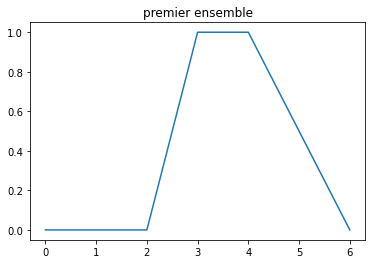

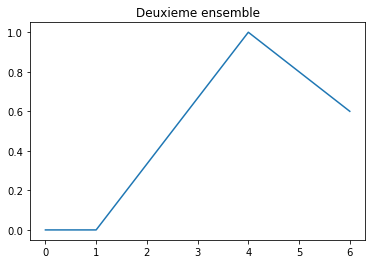

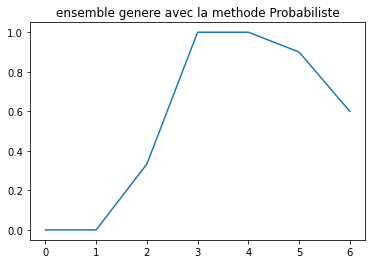

In [849]:
liste=[(3,1),(4,1),(6,0)]
liste2=[(1,0),(4, 1),(6, 0.6)]
print("proba")
tnorme=Tconorme([],"Probabiliste")
tnorme.fonctionn(liste,liste2)


Luka


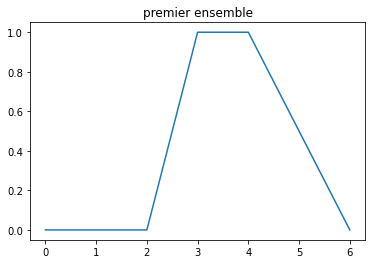

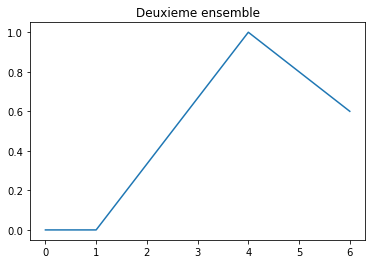

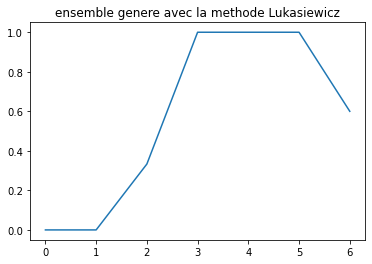

In [850]:
print("Luka")
tnorme2=Tconorme([],"Lukasiewicz")
tnorme2.fonctionn(liste,liste2)

Zadeh


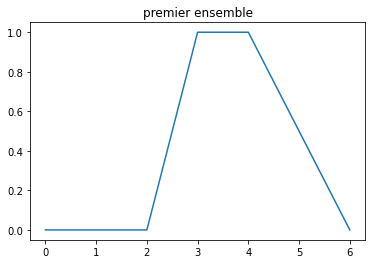

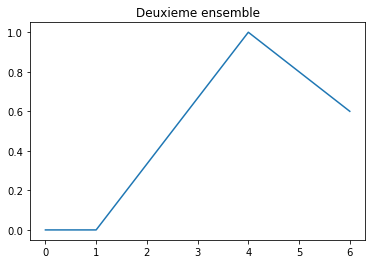

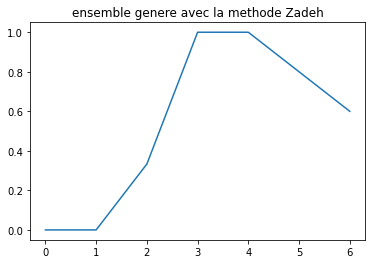

In [851]:
print("Zadeh")
tnorme3=Tconorme([],"Zadeh")
tnorme3.fonctionn(liste,liste2)

# Intersection et Union

In [854]:
def complementaireliste(liste):# creer un complementaire sans generer tout les points
    listef=[]
    for i in range(len(liste)):
        listef.append((liste[i][0],1-liste[i][1]))
    return listef

In [855]:
def Aunioncomplementaire(liste,fonction):# creer un complementaire et fait l'Union
    liste2=complementaireliste(liste)
    print(liste2)
    if fonction=="Probabiliste":
        tnorme=Tconorme([],"Probabiliste")
        tnorme.fonctionn(liste,liste2)
    if fonction=="Lukasiewicz":

        tnorme2=Tconorme([],"Lukasiewicz")
        tnorme2.fonctionn(liste,liste2)
    if fonction=="Zadeh":
        tnorme3=Tconorme([],"Zadeh")
        tnorme3.fonctionn(liste,liste2)
        
        
    
liste=[(0,0),(4,1),(6,0)]


[(0, 1), (4, 0), (6, 1)]


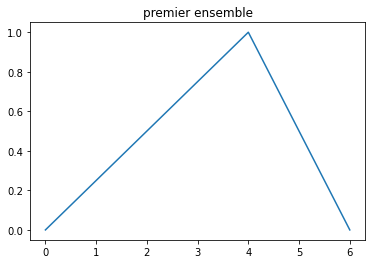

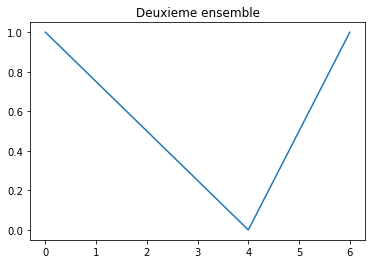

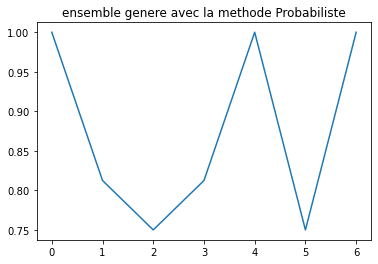

In [856]:
Aunioncomplementaire(liste ,"Probabiliste")


[(0, 1), (4, 0), (6, 1)]


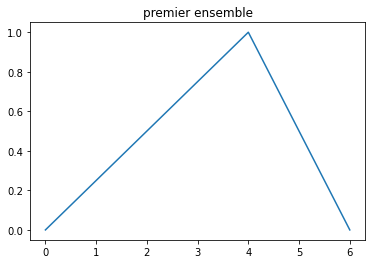

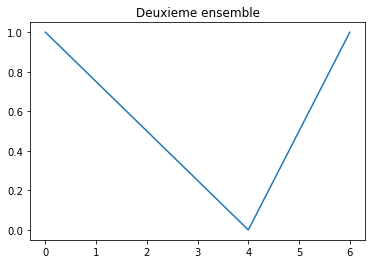

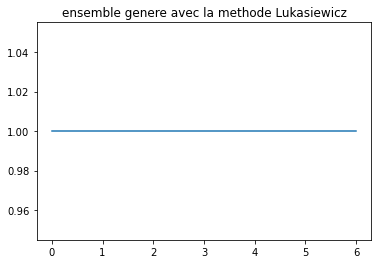

In [776]:
Aunioncomplementaire(liste ,"Lukasiewicz")


[(0, 1), (4, 0), (6, 1)]


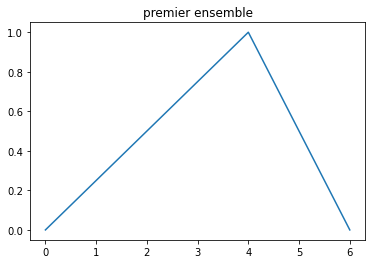

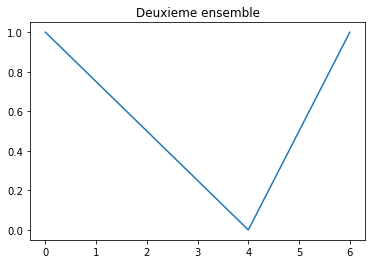

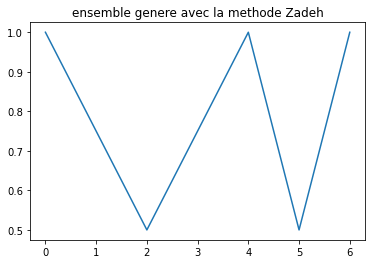

In [777]:
Aunion(liste ,"Zadeh")

In [857]:
def AinterBcomplementaire(liste,fonction):#creer un complementaire et fait l'intersection
    liste2=complementaireliste(liste)
    print(liste2)
    if fonction=="Probabiliste":
        tnorme=Tnorme([],"Probabiliste")
        tnorme.fonctionn(liste,liste2)
    if fonction=="Lukasiewicz":

        tnorme2=Tnorme([],"Lukasiewicz")
        tnorme2.fonctionn(liste,liste2)
    if fonction=="Zadeh":
        tnorme3=Tnorme([],"Zadeh")
        tnorme3.fonctionn(liste,liste2)
        
        
    
liste=[(0,0),(4,1),(6,0)]

[(0, 1), (4, 0), (6, 1)]


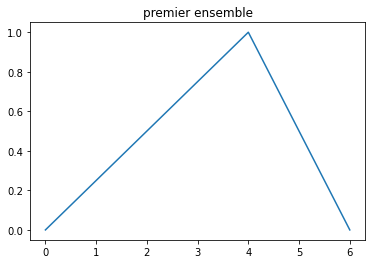

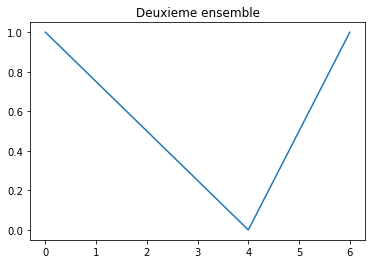

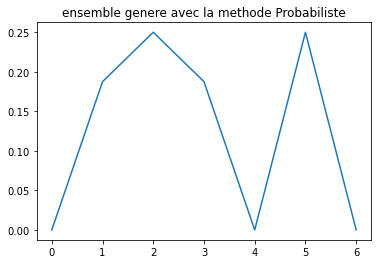

In [858]:
AinterBcomplementaire(liste ,"Probabiliste")

[(0, 1), (4, 0), (6, 1)]


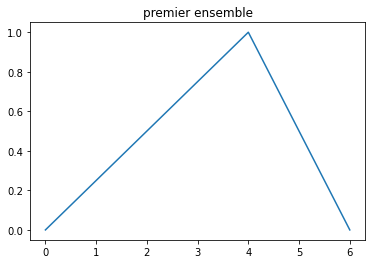

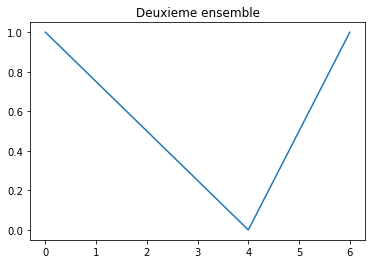

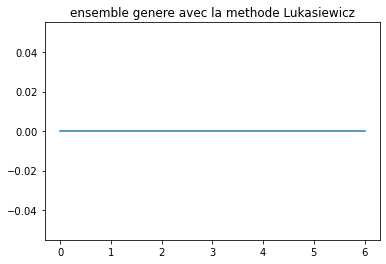

In [859]:
AinterBcomplementaire(liste ,"Lukasiewicz")

[(0, 1), (4, 0), (6, 1)]


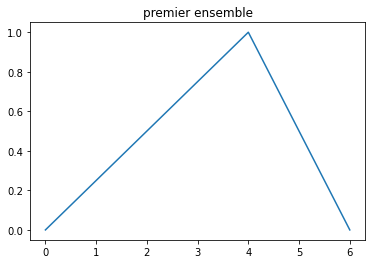

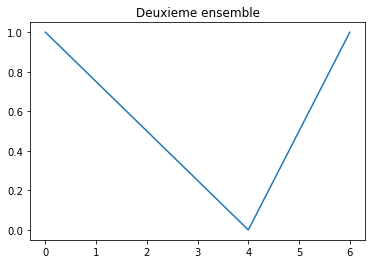

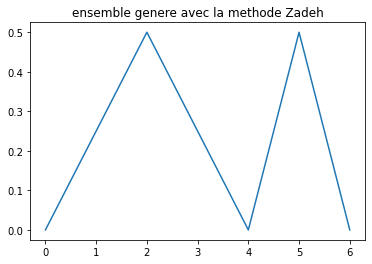

In [860]:
AinterBcomplementaire(liste ,"Zadeh")

# Extension

In [918]:


class extensionexemple1:# exemple avec une fonction x^2
    def __init__(self, listeapp):
        self.liste = listeapp
        
    def calcule(self,x):
        return self.liste[x][1]**2
    def antecedent(self,y):
        resultat=np.sqrt(y)
        antecedent=[]
        for i in range(len(self.liste)):
            if resultat==self.liste[i][1]:
                antecedent.append(self.liste[i][0])
            if i!=0:
                if resultat<self.liste[i][1] and resultat>self.liste[i-1][1]:
                    antecedent.append(self.liste[i-1][0]+(-(self.liste[i][1]-resultat)/np.abs(self.liste[i][1]-self.liste[i-1][1])))
                if resultat>self.liste[i][1] and resultat<self.liste[i-1][1]:
                    antecedent.append(self.liste[i-1][0]+(-(self.liste[i-1][1]-resultat)/np.abs(self.liste[i][1]-self.liste[i-1][1])))

        return antecedent
    
    
class extensionexemple2:# exemple avec une fonction sqrt(2)
    def __init__(self, listeapp):
        self.liste = listeapp
        
    def calcule(self,x):
        return np.sqrt(self.liste[x][1])
    def antecedent(self,y):
        
        resultat=y**2
        antecedent=[]
        for i in range(len(self.liste)):
            if resultat==self.liste[i][1]:
                antecedent.append(self.liste[i][0])
            if i!=0:
                if resultat<self.liste[i][1] and resultat>self.liste[i-1][1]:
                    antecedent.append(self.liste[i-1][0]+(-(self.liste[i][1]-resultat)/np.abs(self.liste[i][1]-self.liste[i-1][1])))
                if resultat>self.liste[i][1] and resultat<self.liste[i-1][1]:
                    antecedent.append(self.liste[i-1][0]+(-(self.liste[i-1][1]-resultat)/np.abs(self.liste[i][1]-self.liste[i-1][1])))

        return antecedent
    
        
        

In [925]:
def extension(A):# creer x^2 et calcul l'ensemble d'arrive
    plt.title("ensemble de depart")
    listeappartenance=visualisation(A)
    extension=extensionexemple(listeappartenance)
    image=[]
    for i in range(len(listeappartenance)):
        image.append((i,extension.calcule(i)))
    plt.title("ensemble d'arrive")
    plt.plot(*zip(*image))
    plt.show()
    return image
        
    

In [927]:
def extension2(A):# creer sqrt(x) et calcul l'ensemble d'arrive
    plt.title("ensemble de depart")
    listeappartenance=visualisation(A)
    extension=extensionexemple2(listeappartenance)
    image=[]
    for i in range(len(listeappartenance)):
        image.append((i,extension.calcule(i)))
    plt.title("ensemble d'arrive")
    plt.plot(*zip(*image))
    plt.show()
    return image
        
    

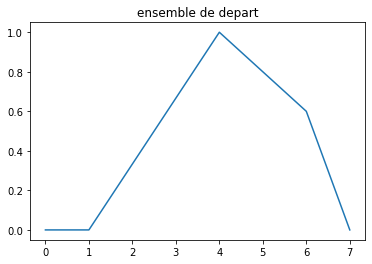

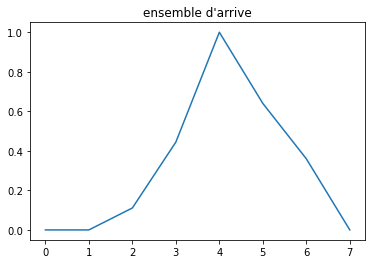

In [928]:
v=extension([(1,0),(4, 1),(6, 0.6),(7,0)])


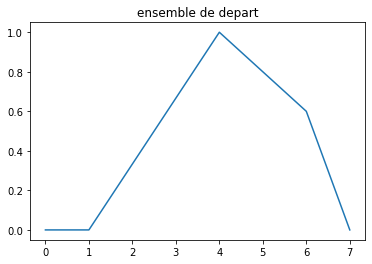

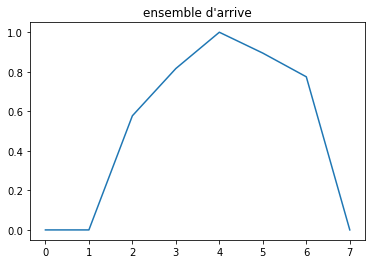

[(0, 0.0), (1, 0.0), (2, 0.5773502691896257), (3, 0.816496580927726), (4, 1.0), (5, 0.8944271909999159), (6, 0.7745966692414834), (7, 0.0)]


In [942]:
v=extension2([(1,0),(4, 1),(6, 0.6),(7,0)])
print(v)

# Operation logique 

In [944]:
class implication:
    def __init__(self, liste, fonction):
        self.liste = liste
        self.fonction = fonction# choix de la fonction
        
        
    def norme(self,listeinput1,listeinput2):# on chosiit la bonne fonction
        if self.fonction=="Larsen":
            return self.Larsen(listeinput1,listeinput2)
        elif self.fonction=="Lukasiewicz":
            return self.Lukasiewicz(listeinput1,listeinput2)
        elif self.fonction== "Mamdani":
            return self.Mamdani(listeinput1,listeinput2)

    def Larsen(self,liste1,liste2):# Larsen
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,np.dot(liste1b[i][1],liste2b[i][1])))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef
    def Lukasiewicz(self,liste1,liste2):# Lukasiewicz
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        
        for i in range(len(liste1b)):
            listef.append((i,min(1-liste1b[i][1]+liste2b[i][1],1)))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef

    def Mamdani(self,liste1,liste2):#Mamdani
        liste11=liste1
        liste12=liste2
        listef=[]
        memeintervalle(liste11,liste12)
        plt.title("premier ensemble")
        liste1b=visualisation(liste11)
        plt.title("Deuxieme ensemble")
        liste2b=visualisation(liste12)
        for i in range(len(liste1b)):
            listef.append((i,min(liste1b[i][1],liste2b[i][1])))
        plt.title("ensemble genere avec la methode "+self.fonction)
        plt.plot(*zip(*listef))
        plt.show()
        return listef

    def fonctionn(self,listeinput1,listeinput2):# on met à jour liste 
        self.liste=self.norme(listeinput1,listeinput2)

In [783]:
liste=[(1,1),(5,0),(6,1)]
liste2=[(1,0),(4, 1),(6, 0.6)]


In [784]:
#print("proba")
#imp=implication([],"Larsen")
#imp.fonctionn(liste,liste2)
#b=imp.liste
#print(b)
#newliste=[(1,0),(3, 1),(6, 0.4)]
#print("Lukasiewicz")


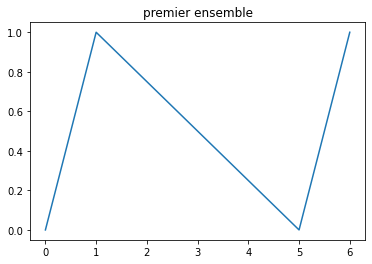

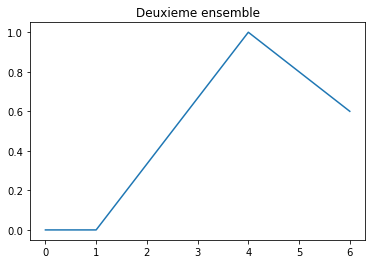

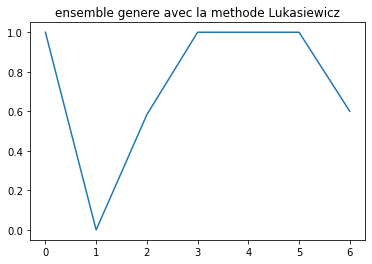

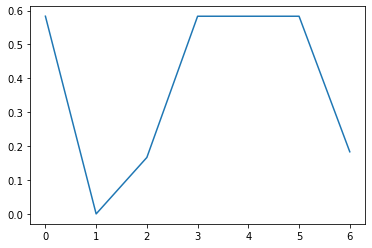

In [1029]:
liste=[(1,1),(5,0),(6,1)]
liste2=[(1,0),(4, 1),(6, 0.6)]


imp=implication([],"Lukasiewicz")
imp.fonctionn(liste,liste2)
b=imp.liste
newliste=[(1,0),(3, 1),(6, 0)]

def MPG(x0,AB,fonction):
    point=[]
    if fonction=="Lukasiewicz":
        for i in range(len(AB)):
            v=max((AB[x0][1]+AB[i][1]-1),0)
            print
            point.append((i,v))
            
        return visualisation(point)
    if fonction=="Probabiliste":
        for i in range(len(AB)):
            v=np.dot(AB[x0][1],AB[i][1])
            point.append((i,v))
        return visualisation(point)
    if fonction=="Zadeh":
        for i in range(len(AB)):
            v=min(AB[x0][1],AB[i][1])
            point.append((i,v))
        return visualisation(point)
        
print("resultat avec implication Lukasiewicz et Tnorme Lukasiewicz ")
a=MPG(2,b,"Lukasiewicz")

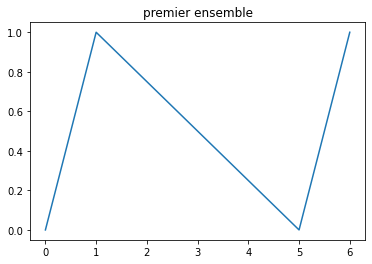

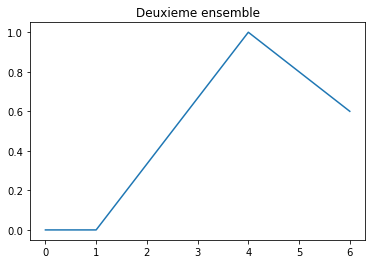

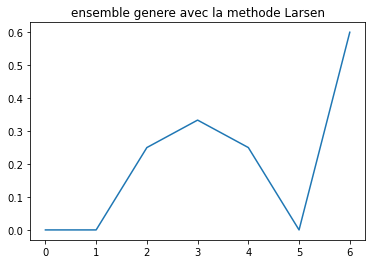

resultat avec implication Larsen et Tnorme Probabiliste 


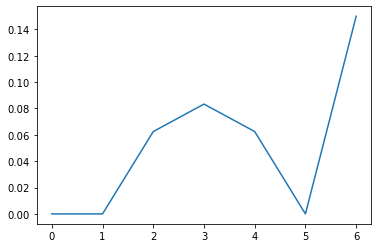

In [1032]:
liste=[(1,1),(5,0),(6,1)]
liste2=[(1,0),(4, 1),(6, 0.6)]
imp=implication([],"Larsen")
imp.fonctionn(liste,liste2)
b=imp.liste
print("resultat avec implication Larsen et Tnorme Probabiliste ")
a=MPG(2,b,"Probabiliste")

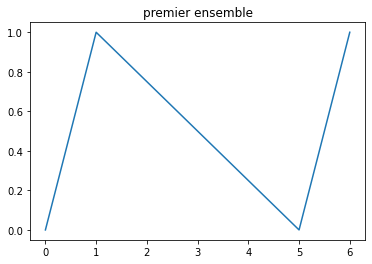

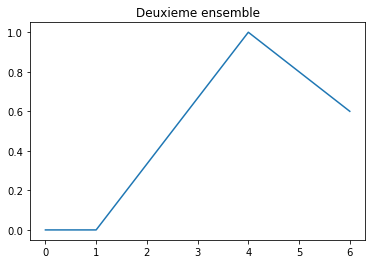

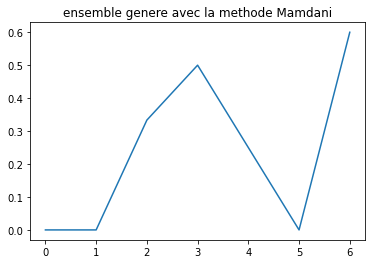

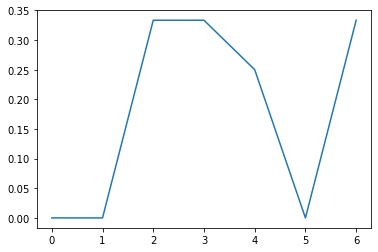

In [1031]:
liste=[(1,1),(5,0),(6,1)]
liste2=[(1,0),(4, 1),(6, 0.6)]
imp=implication([],"Mamdani")
imp.fonctionn(liste,liste2)
b=imp.liste
print("resultat avec implication Mamdani et Tnorme Zadeh ")
a=MPG(2,b,"Zadeh")